In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('./Data/FINAL_DATASET_DOG.csv',encoding='euc-kr',index_col=0)
df_test.columns

Index(['age', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'orgNm',
       'popfile', 'processState', 'sexCd', 'specialMark', 'weight',
       'noticeComment'],
      dtype='object')

In [3]:
df_test.rename(columns={'age':'나이', 'careAddr': '보호장소', 'careNm':'보호소이름', 'careTel':'보호소전화번호','chargeNm':'담당자','colorCd':'색상','desertionNo':'유기번호','filename':'썸네일사진',
                       'happenDt':'접수일','happenPlace':'발견장소','kindCd':'품종','neuterYn':'중성화여부','noticeSdt':'공고시작일','officetel':'담당자연락처',
                       'orgNm':'관할기관','popfile':'사진','processState':'상태','sexCd':'성별','specialMark':'특징','weight':'체중','noticeComment':'특이사항',
                       'noticeEdt':'공고종료일','noticeNo':'공고번호'},inplace=True)


In [4]:
df_test.columns

Index(['나이', '보호장소', '보호소이름', '보호소전화번호', '담당자', '색상', '유기번호', '썸네일사진', '접수일',
       '발견장소', '품종', '중성화여부', '공고종료일', '공고번호', '공고시작일', '담당자연락처', '관할기관', '사진',
       '상태', '성별', '특징', '체중', '특이사항'],
      dtype='object')

In [5]:
df_test.to_csv('./Data/FINAL_DOG_DOG.csv',encoding='euc-kr')

---

## 여기서부터 💔

In [6]:
RAW = pd.read_csv('./Data/FINAL_DOG_DOG.csv',encoding='euc-kr',index_col=0)

In [351]:
df_test = pd.read_csv('./Data/FINAL_DOG_DOG.csv',encoding='euc-kr',index_col=0)
df_test.head(1)

,나이,보호장소,보호소이름,보호소전화번호,담당자,색상,유기번호,썸네일사진,접수일,발견장소,...,공고번호,공고시작일,담당자연락처,관할기관,사진,상태,성별,특징,체중,특이사항
0,NaN,서울특별시 양천구 등촌로 160 (목동) 1층,강현림동물병원,02-2642-9159,양천구청,갈색,4.113140e+14,http://www.animal.go.kr/files/shelter/2016/10/...,2017,신정동신정119안전센터 (다음1-1),...,서울-양천-2017-00001,20170101,02-2620-4918,서울특별시 양천구,http://www.animal.go.kr/files/shelter/2016/10/...,종료(입양),M,치석ㅇ&#47552;으며온순하고잘따르나천방지축임,38(Kg),NaN


In [352]:
df_test['나이'].unique()

array([      nan, 2.000e+01, 1.900e+01, 2.000e+00, 1.000e+01, 2.020e+03,
       2.016e+03])

In [353]:
df_test['나이'] = df_test['나이'].apply(lambda x : str(x[:-4])
df_test['나이'].unique()

array(['', '20'], dtype=object)

In [354]:
df_test['나이'] = df_test['나이'].replace('','바보')

In [322]:
df_test['나이'] = df_test.replace('`','바보')
df_test['나이'] = df_test.replace('-','바보')


In [323]:
df_test['나이'].unique()

array([nan, 20.0, 19.0, 2.0, 10.0, 2020.0, 2016.0], dtype=object)

In [324]:
df_age = df_test.loc[df_test['나이'] != '바보']
df_age['나이'].unique()

array([nan, 20.0, 19.0, 2.0, 10.0, 2020.0, 2016.0], dtype=object)

In [325]:
df_test = df_age

In [326]:
df_test.to_csv('./Data/#1.csv',encoding='euc-kr')

## 💟 나이말고

In [349]:
df_test['나이']

32768     20
32769     20
32770     20
32771     20
32772     20
          ..
425979    20
425980    20
425981    20
425982    20
425983    20
Name: 나이, Length: 196569, dtype: int32

In [332]:
df_test = df_test[df_test['나이'].apply(lambda x : len(str(x)) == 4)]

In [333]:
df_test['나이'].unique()

array([20.0, 19.0, 10.0], dtype=object)

In [334]:
df_test = df_test[df_test['나이'] != '1018']
df_test['나이'].unique()

array([20.0, 19.0, 10.0], dtype=object)

In [335]:
df_test.shape

(196569, 23)

In [336]:
df_test['나이'] = df_test['나이'].astype('int')


### 접수일 💫

In [337]:
df_test['접수일'] = df_test['접수일'].astype('str')

In [338]:
df_test['접수일']= df_test['접수일'].apply(lambda x : x[:4])


In [339]:
df_test['접수일'].unique()

array(['2017', '2018', '2019', '2021'], dtype=object)

In [346]:
df_test['접수일'] = df_test['접수일'].astype('int')

In [347]:
df_test['당시의나이'] = df_test['접수일'] - df_test['나이']

In [348]:
df_test['당시의나이'].value_counts()

1999    65623
1998    57883
1997    40294
2001    32765
2000        3
2009        1
Name: 당시의나이, dtype: int64

In [343]:
df_test['당시의나이'] = df_test['당시의나이'].replace(-1,0)
df_test.head(1)

,나이,보호장소,보호소이름,보호소전화번호,담당자,색상,유기번호,썸네일사진,접수일,발견장소,...,공고시작일,담당자연락처,관할기관,사진,상태,성별,특징,체중,특이사항,당시의나이
32768,20,전라남도 순천시 상사면 민속마을길 978 (상사면) .,대한동물사랑협회,061-755-7547,순천시,검정,4.464820e+14,http://www.animal.go.kr/files/shelter/2017/07/...,2017,상사면 쌍지리,...,20170724,061-749-3094,전라남도 순천시,http://www.animal.go.kr/files/shelter/2017/07/...,보호중,M,검정,3(Kg),NaN,1997


In [344]:
df_test['당시의나이'].unique()

array([1997, 1998, 1999, 2009, 2000, 2001], dtype=int32)

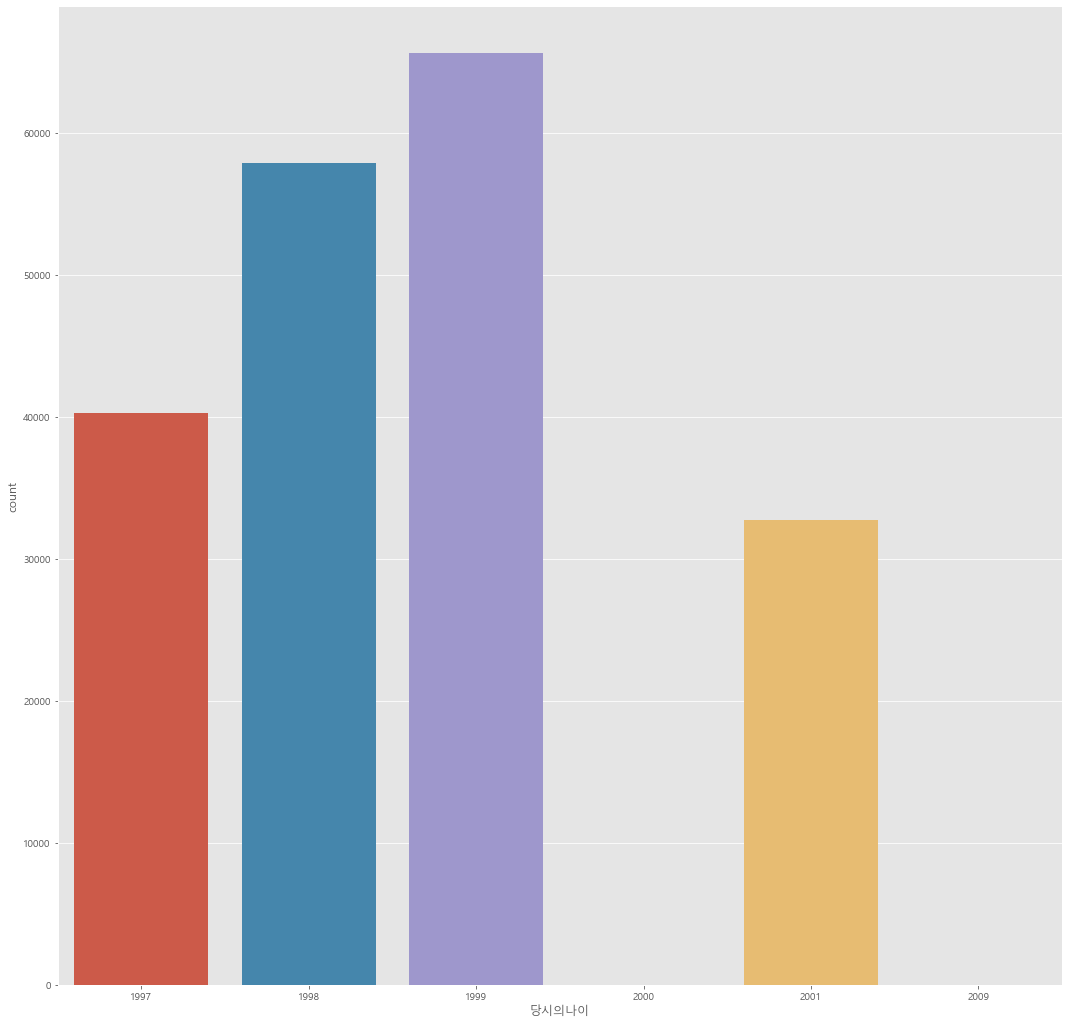

In [345]:
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] ='Malgun Gothic'

plt.style.use('ggplot')
plt.figure(figsize = (18, 18))
sns.countplot('당시의나이',data = df_test)
plt.show()

## 중성화 🔯
---

In [30]:
df_test.columns

Index(['나이', '보호장소', '보호소이름', '보호소전화번호', '담당자', '색상', '유기번호', '썸네일사진', '접수일',
       '발견장소', '품종', '중성화여부', '공고종료일', '공고번호', '공고시작일', '담당자연락처', '관할기관', '사진',
       '상태', '성별', '특징', '체중', '특이사항', '당시의나이'],
      dtype='object')

In [31]:
df_test['중성화여부'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [32]:
df_test['중성화여부'] = pd.Categorical(df_test['중성화여부'])
df_test['중성화여부'] = df_test['중성화여부'].map({'N' : 0 , 'U' : 1, 'Y' : 2})

In [33]:
df_test['중성화여부'].unique()

[0, 2, 1]
Categories (3, int64): [0, 2, 1]

In [34]:
df_test.to_csv('#2_중성화까지.csv',encoding='euc-kr')

### Drop Columns 💢
---

In [35]:
df_test.columns

Index(['나이', '보호장소', '보호소이름', '보호소전화번호', '담당자', '색상', '유기번호', '썸네일사진', '접수일',
       '발견장소', '품종', '중성화여부', '공고종료일', '공고번호', '공고시작일', '담당자연락처', '관할기관', '사진',
       '상태', '성별', '특징', '체중', '특이사항', '당시의나이'],
      dtype='object')

## 체중 💦 --> 💥 Catch Point 💥
---

In [36]:
# df_prac 으로 사용하기 

df_prac = df_test[['공고번호','보호소이름','품종','색상','성별','체중','중성화여부','당시의나이','접수일', '상태']]


### 정규식으로 쉽게 💌

In [37]:

df_prac['체중'] = df_test['체중'].apply(lambda x : x[:-4])
df_prac[['체중_소수점','체중_정수']] = df_prac['체중'].str.extract(r'(\d+\.\d+)|(\d+)')
df_prac['체중']=  df_prac['체중_소수점'].fillna(df_prac['체중_정수'])

df_prac = df_prac.loc[df_prac['체중'].apply(lambda x: x is not np.NaN)]
df_prac = df_prac.loc[df_prac['체중'].apply(lambda x: x is not None)]

df_prac['체중'] = df_prac['체중'].astype('float')


In [38]:
df_prac['체중'].isnull().sum()

0

#### 체중 Outlier 처리 --- 💨
---

In [39]:
df_prac['체중'].unique()

array([ 38.  ,   3.1 ,   5.  , ..., 310.  , 230.  ,  27.66])

In [40]:
df_prac[df_prac['체중'].apply(lambda x : x >= 100)].index

Int64Index([  3559,  12929,  14164,  14527,  15865,  23510,  24615,  31106,
             33483,  39176,
            ...
            425942, 425943, 426063, 426064, 426083, 426303, 426304, 426308,
            426330, 426331],
           dtype='int64', length=162)

In [41]:
change_weight_index = df_prac[df_prac['체중'].apply(lambda x : x >= 100)].index

In [42]:
new_weight = df_prac.loc[change_weight_index, '체중'].apply(lambda x : x / 1000)

In [43]:
df_prac.loc[change_weight_index, '체중'] = new_weight

In [44]:
df_prac[df_prac['체중'] == 20180.323]

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태,체중_소수점,체중_정수
90784,경기-평택-2018-00509,평택시유기동물보호소,[개] 믹스견,기타,F,20180.323,0,0,종료(입양),NaN,20180323


In [45]:
df_prac.drop(90784,axis=0, inplace=True)

<AxesSubplot:xlabel='체중'>

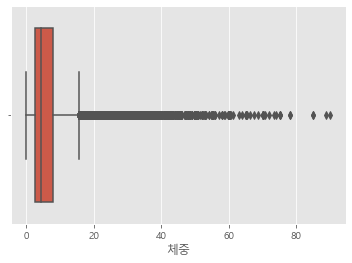

In [46]:
sns.boxplot('체중', data=df_prac)

##### 체중 범주화 처리 💢
---
    기준을 찾기

### 범주화 하지말자!
---

count, bin_dividers = np.histogram(df_prac['체중'], bins=5)

print(bin_dividers)

bin_names = ['소소','소', '중','중중', '대']

df_prac['NEW_체중'] = pd.cut(x = df_prac['체중'],
                       bins= bin_dividers,
                       labels=bin_names,
                       include_lowest=True)

df_prac['체중'] = df_prac['NEW_체중']
df_prac.info()

df_prac.drop('NEW_체중', axis=1, inplace=True)

df_prac['체중'] = df_prac['체중'].map({'소소':1,'소': 2, '중' : 3 ,'중중': 4,'대': 5})
df_prac['체중'].unique()

In [47]:
# 오예

df_prac.to_csv('./Data/#3_체중까지.csv',encoding='cp949')

---
## 성별 💤

In [48]:
df_3 = pd.read_csv('./Data/#3_체중까지.csv',encoding='cp949',index_col=0)

In [49]:
df_3['성별'].unique()

array(['M', 'F', 'Q'], dtype=object)

In [50]:
df_3 = df_3.loc[df_3['성별'] != 'Q']


In [51]:
df_3['성별'] = pd.Categorical(df_3['성별'])

df_3['성별'] = df_3['성별'].map({'M': 0, 'F': 1})

In [52]:
df_3['성별'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [53]:
df_3.to_csv('./Data/#4_성별까지.csv',encoding='cp949')

---
## 상태 💤
---
입양 --> 걍 두고 |  y = 1 <br>
반환 --> 주인한테 돌아간거 |  drop / no drop <br>
미포획 --> 탈주의 가능성 높음 | drop <br>
자연사 --> 사망 | y = 자연사 <br>
기증 --> 다른 센터나 보호소로 보냄 | drop  <br>
안락사 --> 사망 |  y = 안락사 <br>
보호중 --> 보호중 |  drop <br>
방사 --> 탈주 |  drop 

In [221]:
df_4 = pd.read_csv('./Data/#4_성별까지.csv',encoding='cp949',index_col=0)

In [222]:
df_4['상태'] = pd.Categorical(df_4['상태'])

In [223]:
df_4['상태'].unique()

['종료(입양)', '종료(반환)', '종료(미포획)', '종료(자연사)', '종료(기증)', '종료(안락사)', '보호중', '종료(방사)']
Categories (8, object): ['종료(입양)', '종료(반환)', '종료(미포획)', '종료(자연사)', '종료(기증)', '종료(안락사)', '보호중', '종료(방사)']

In [224]:
df_4['옵션'] = df_4['상태'].str.split('(',expand= True)[1]

In [225]:
df_4['옵션'] = df_4['옵션'].str.replace(')','')

<ipython-input-225-df4db5bd8187>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_4['옵션'] = df_4['옵션'].str.replace(')','')


In [226]:
df_4['옵션1'] = df_4['상태'].str.split('(',expand=True)[0]

In [227]:
df_4['상태'] = df_4['옵션'].fillna(df_4['옵션1'])

In [228]:
df_4['상태'].unique()

array(['입양', '반환', '미포획', '자연사', '기증', '안락사', '보호중', '방사'], dtype=object)

In [229]:
df_4.drop(['체중_소수점','체중_정수','옵션','옵션1'],axis=1,inplace=True)

In [230]:
df_4['상태'].unique()

array(['입양', '반환', '미포획', '자연사', '기증', '안락사', '보호중', '방사'], dtype=object)

In [231]:
df_4[df_4['상태'] != '입양']

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
4,전남-여수-2017-00002,유기동물보호소,[개] 말티즈,흰색,0,1.4,0,2,반환
6,충남-천안-2017-00028,천안시유기동물보호소,[개] 포메라니안,블랙탄,0,3.0,0,4,미포획
7,충남-천안-2017-00027,천안시유기동물보호소,[개] 시츄,브라운,1,4.0,0,1,미포획
9,충남-천안-2017-00025,천안시유기동물보호소,[개] 골든 리트리버,골든색,0,40.0,0,1,반환
11,충남-천안-2017-00023,천안시유기동물보호소,[개] 믹스견,흰베이지,1,0.5,0,0,미포획
...,...,...,...,...,...,...,...,...,...
428797,경북-포항-2021-01148,영일동물플러스,[개] 믹스견,흑황백,1,1.3,0,0,보호중
428798,충남-청양-2021-00096,청양보호소,[개] 푸들,회색,0,3.0,0,1,보호중
428799,경기-화성-2021-01373,남양유기견보호센터,[개] 말티즈,흰색,1,5.0,1,4,보호중
428800,경북-상주-2021-00513,상주유기동물보호센터,[개] 믹스견,흰,1,8.0,1,0,보호중


In [232]:
# 쓸모없는 상태를 버리고 

df_4 = df_4[(df_4['상태'] != '방사' ) & (df_4['상태'] != '미포획') & (df_4['상태'] != '반환') & (df_4['상태'] != '기증') & (df_4['상태'] != '보호중')]
df_4['상태'].unique()
# 상태를 두 분류로 나눈다.

df_4.loc[df_4['상태'] != '입양','상태'] = '입양아님'

In [233]:
# 그리고 카테고리화 하고 / 1,0 으로 바꾸기
df_4['상태'] = pd.Categorical(df_4['상태'])
df_4['상태'] = df_4['상태'].map({'입양': 0, '입양아님' : 1})

df_4.head(2)

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,서울-양천-2017-00001,강현림동물병원,[개] 골든 리트리버,갈색,0,38.0,0,5,0
1,서울-중랑-2017-00003,한국동물구조관리협회,[개] 푸들,갈,0,3.1,0,4,0


In [317]:
df_4['상태'].value_counts(0)

1    195337
0    132472
Name: 상태, dtype: int64

In [234]:
df_4['상태'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [235]:
df_4.to_csv('./Data/#5_상태까지.csv',encoding='cp949')

---
## 종 💤

## 가져온 종류와 기존의 DATASET 비교 💔
---

In [236]:
df_kinds = pd.read_csv('./Data/#5_상태까지.csv',encoding='cp949',index_col=0)

kinds = pd.read_csv('./Data/바보.csv',encoding='cp949',index_col=0)


In [237]:
df_kinds['품종'] = df_kinds['품종'].apply(lambda x : x[4:])

In [238]:
kinds_list = np.array(kinds['0'].tolist())
kinds_list = kinds_list.tolist()

In [239]:
for i in range(len(kinds_list)):
    kinds_list[i] = kinds_list[i].replace(' ','')

In [240]:
kinds_list.append('골든리트리버')

In [241]:
'''공백을 없애자'''

df_kinds['품종'] = df_kinds['품종'].str.replace(' ','')


In [242]:
''' 믹스견을 처리하자 '''

mixed_index = df_kinds[df_kinds['품종'].str.contains('혼합|혼종|잡종|mix|믹스|믹스견|&|잡견|혼혈')].index
df_kinds.loc[mixed_index,'품종']='믹스견'

#### 종류_list에 안 속해있는 놈들 ❌
---

In [243]:
df_kinds_error = df_kinds[df_kinds['품종'].apply(lambda x : x in kinds_list) == False]

##### 수가 10개 이상인 품종을 찾자

In [244]:
value_10_over = pd.DataFrame(df_kinds_error['품종'].value_counts() > 10)

In [245]:
value_true = value_10_over[value_10_over['품종']== True]

In [250]:
value_true

['발바리',
 '폼피츠',
 '발발이',
 '래브라도리트리버',
 '미니핀',
 '들개',
 '허스키',
 '진도',
 '재래종',
 '비숑',
 '리트리버',
 '말티푸',
 '레브라도리트리버',
 '풍산개',
 '사냥개']

##### 기존에 가지고 있는 list랑 이름을 맞춰주자

In [246]:
value_true = value_true.index.tolist()

In [247]:
value_check = pd.read_excel('./Data/아아.xlsx')
value_check = value_check[0].tolist()

In [248]:
value_final = []

for i in range(len(value_check)):
    value_final.append(value_check[i])

In [249]:
value_final

['발바리',
 '폼피츠',
 '발바리',
 '라브라도리트리버',
 '미니어처핀셔',
 '들개',
 '시베리안허스키',
 '진도견',
 '비숑프리제',
 0,
 0,
 '믹스견',
 0,
 '사냥개',
 '라브라도리트리버']

In [251]:
for i in range(len(value_final)):
    if value_final[i] == 0:
        value_final[i] = '바보'

In [254]:
df_kinds_error = df_kinds_error[df_kinds_error['품종'].apply(lambda x : x in value_true)]

In [255]:
df_kinds_error['품종'].value_counts()

발바리         586
폼피츠          37
발발이          35
래브라도리트리버     27
미니핀          25
들개           24
허스키          20
진도           14
비숑           13
재래종          13
리트리버         12
말티푸          12
풍산개          11
사냥개          11
레브라도리트리버     11
Name: 품종, dtype: int64

In [256]:
for i in range(len(value_final)):
#     df_kinds_error['품종'] = df_kinds_error['품종'].str.replace(value_true[i],value_final[i])
    df_kinds_error.loc[df_kinds_error['품종']==value_true[i],'품종'] = value_final[i]


In [257]:
df_kinds_error = df_kinds_error.loc[df_kinds_error['품종'] != '바보']

In [258]:
df_kinds_error['품종'].value_counts()

발바리         621
라브라도리트리버     49
폼피츠          37
미니어처핀셔       25
들개           24
시베리안허스키      20
진도견          14
비숑프리제        13
믹스견          12
Name: 품종, dtype: int64

#### 종류 list에 속해있는 놈들 ⭕
---

In [259]:
df_kinds_true = df_kinds[df_kinds['품종'].apply(lambda x : x in kinds_list) == True]

In [260]:
len(df_kinds_true)

326665

In [264]:
df_kinds_true['품종'].value_counts().index.values

array(['믹스견', '푸들', '말티즈', '진도견', '포메라니안', '시츄', '스피츠', '요크셔테리어', '치와와',
       '닥스훈트', '라브라도리트리버', '골든리트리버', '코카스파니엘', '웰시코기펨브로크', '미니어쳐핀셔',
       '프렌치불독', '시베리안허스키', '슈나우져', '비글', '비숑프리제', '보스턴테리어', '보더콜리', '퍼그',
       '페키니즈', '불독', '포인터', '셰퍼드', '시바', '삽살개', '말라뮤트', '사모예드', '풍산견',
       '핏불테리어', '그레이하운드', '차우차우', '샤페이', '그레이트피레니즈', '기타', '도사',
       '웰시코기카디건', '알라스칸말라뮤트', '미니어쳐푸들', '토이푸들', '도베르만', '미텔스피츠',
       '이탈리안그레이하운드', '올드잉글리쉬쉽독', '달마시안', '브리타니스파니엘', '셔틀랜드쉽독', '스탠다드푸들',
       '로트와일러', '잉글리쉬세터', '베들링턴테리어', '마리노이즈', '라이카', '아메리칸불리', '케인코르소',
       '콜리', '불테리어', '아메리칸코카스파니엘', '아키다', '빠삐용', '캐벌리어킹찰스스파니엘', '잉글리쉬포인터',
       '제페니즈칭', '잭러셀테리어', '바셋하운드', '동경견', '화이트테리어', '저먼포인터', '잉글리쉬코카스파니엘',
       '바센지', '올드잉글리쉬불독', '아프간하운드', '저먼셰퍼드독', '재패니즈스피츠', '그레이트덴', '미디엄푸들',
       '휘펫', '미니어쳐슈나우저', '폭스테리어', '아이리쉬세터', '복서', '페터데일테리어', '아메리칸핏불테리어',
       '보르조이', '벨기에그로넨달', '아메리칸불독', '도고아르젠티노', '스코티쉬테리어', '버니즈마운틴독',
       '세인트버나드', '티베탄마스티프', '시베리안라이카', '울프독', '스태퍼드셔불테리어', '오브차카',
   

##### 최종 종류를 합쳐보자! 💫
---

In [265]:
df_6 = pd.concat([df_kinds_true,df_kinds_error])
# df_6['품종'] = df_6['품종'].str.replace('진도견견','진도견')

In [269]:
len(list(df_6['품종'].value_counts().index.values))

160

In [277]:
types = pd.read_csv('./Data/종분류.csv', encoding = 'cp949', index_col = 0)
types.head(1)

,분류
골든리트리버,sporting


In [278]:
len(types)

160

In [279]:
types.index[0]

'골든리트리버'

In [280]:
types['분류'][0]

'sporting'

In [281]:
for i in range(len(types)) : 
    df_6.loc[df_6['품종'] == types.index[i],'품종'] = types['분류'][i]

In [282]:
df_6['품종'].unique()

array(['sporting', 'non-sporting', 'mix', 'toy', 'terrier', 'working',
       'foundation stock service', 'hound', 'herding', '기타'], dtype=object)

In [283]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_6['품종'].unique())

labels = encoder.transform(df_6['품종'].unique())

print('인코딩 변환값 : ', labels)

인코딩 변환값 :  [5 4 3 7 6 8 0 2 1 9]


In [284]:
labels

array([5, 4, 3, 7, 6, 8, 0, 2, 1, 9])

In [288]:
# 디코딩 변환값

print('디코딩 변환 값 :' , encoder.inverse_transform([3]))

디코딩 변환 값 : ['mix']


In [286]:
품종_고유값 = df_6['품종'].unique()

In [287]:
# category 화 

df_6['품종'] = pd.Categorical(df_6['품종'])
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327480 entries, 0 to 418381
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   공고번호    327480 non-null  object  
 1   보호소이름   327480 non-null  object  
 2   품종      327480 non-null  category
 3   색상      327471 non-null  object  
 4   성별      327480 non-null  int64   
 5   체중      327480 non-null  float64 
 6   중성화여부   327480 non-null  int64   
 7   당시의나이   327480 non-null  int64   
 8   상태      327480 non-null  int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 22.8+ MB


In [289]:
for i in range(len(labels)):
    df_6['품종'] = df_6['품종'].replace(품종_고유값[i], labels[i])

In [290]:
df_6['품종'].value_counts()

3    235289
7     35701
4     22412
0     15016
5      6464
8      3533
2      3481
1      3093
9      1877
6       614
Name: 품종, dtype: int64

In [292]:
df_6.to_csv('./Data/#6_품종까지.csv',encoding='cp949')

### 색상 💫
---

In [293]:
df_6 = pd.read_csv('./Data/#6_품종까지.csv',encoding='cp949', index_col=0)

In [294]:
final_color = pd.read_csv('./data/FInal_Color.csv',encoding='utf-8',index_col=0)
final_color['색상최종'].unique()

array(['혼합', '흰색', '갈색', '검정색', '노란색'], dtype=object)

In [295]:
df_7 = pd.merge(df_6,final_color, how='inner', on='공고번호')
df_7['색상'] = df_7['색상최종']

In [296]:
df_7.drop('색상최종',axis=1,inplace=True)

In [297]:
df_7['색상'] = pd.Categorical(df_7['색상'])

#### 흰색 - 1, 검정색 - 2, 노란색 - 3, 갈색 - 4, 혼합 - 5

In [298]:
df_7['색상'] = df_7['색상'].map({'흰색' : 1, '검정색' : 2, '노란색': 3,'갈색':4, '혼합' : 5})

In [299]:
df_7.to_csv('./Data/#7_색상까지_FINAL.csv',encoding='cp949')

#### 최종 DATASET 💝
---
    범주화 했던 자료들을 --> 데이터셋을 불러오고 나서, category 타입으로 바꿔주자
    
    품종
    색상
    성별
    체중
    중성화여부
    상태
    
    
    

In [300]:
df_final = pd.read_csv('./Data/#7_색상까지_FINAL.csv',encoding='cp949',index_col=0)
df_final.head(2)


,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,서울-양천-2017-00001,강현림동물병원,5,4,0,38.0,0,5,0
1,서울-중랑-2017-00003,한국동물구조관리협회,4,4,0,3.1,0,4,0


### 직영과 위탁을 나누자 💢
---



##### 진규님이 변환해준 csv파일로 하기!

In [301]:
df_money = pd.read_csv('./Data/위탁보호소.csv',encoding='cp949',index_col=0)
df_service = pd.read_csv('./Data/직영보호소.csv',encoding='cp949',index_col=0)


In [304]:
df_service.head(2)

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
X,,,,,,,,,
3,전남-여수-2017-00001,유기동물보호소,29,1,0,3.10,0,3,1
11,경기-가평-2017-00002,가평군유기동물보호소,38,2,0,7.95,0,3,1


In [305]:
service_list=  list(df_service['보호소이름'].unique())

In [307]:
money_list = list(df_money['보호소이름'].unique())

In [306]:
df_final

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,서울-양천-2017-00001,강현림동물병원,5,4,0,38.00,0,5,0
1,서울-중랑-2017-00003,한국동물구조관리협회,4,4,0,3.10,0,4,0
2,경남-거창-2017-00004,백동물병원,3,1,1,5.00,0,1,0
3,전남-여수-2017-00001,유기동물보호소,7,1,0,3.10,0,3,0
4,충남-천안-2017-00029,천안시유기동물보호소,6,2,1,15.00,0,1,0
...,...,...,...,...,...,...,...,...,...
337432,경북-포항-2021-00902,영일동물플러스,3,1,0,3.50,2,3,0
337433,세종-세종-2021-00339,세종유기동물보호센터,9,1,1,7.20,1,2,0
337434,대구-달성-2021-00563,포산동물병원,9,5,1,3.74,0,0,1
337435,강원-원주-2021-00542,원주유기동물보호센터,9,4,1,8.00,0,3,1


In [308]:
직영 = df_final[df_final['보호소이름'].apply(lambda x : x in service_list)]
위탁 = df_final[df_final['보호소이름'].apply(lambda x : x in money_list)]

In [309]:
직영

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
3,전남-여수-2017-00001,유기동물보호소,7,1,0,3.10,0,3,0
10,경기-가평-2017-00002,가평군유기동물보호소,3,2,0,7.95,0,3,0
11,경기-가평-2017-00001,가평군유기동물보호소,4,4,1,2.75,0,2,0
19,대전-유성-2017-00001,대전동물보호센터,4,3,0,4.00,1,1,0
21,대전-유성-2017-00002,대전동물보호센터,7,3,1,3.00,1,5,0
...,...,...,...,...,...,...,...,...,...
336952,충북-충주-2018-00283,충주시동물보호센터,3,1,0,4.20,0,3,0
337280,대전-동구-2020-00119,대전동물보호센터,9,3,1,2.00,1,1,0
337292,강원-화천-2020-00040,화천군농업기술센터,8,2,1,20.00,0,5,0
337336,전남-여수-2020-00310,유기동물보호소,8,2,0,28.50,0,4,0


In [310]:
위탁

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,서울-양천-2017-00001,강현림동물병원,5,4,0,38.00,0,5,0
1,서울-중랑-2017-00003,한국동물구조관리협회,4,4,0,3.10,0,4,0
2,경남-거창-2017-00004,백동물병원,3,1,1,5.00,0,1,0
4,충남-천안-2017-00029,천안시유기동물보호소,6,2,1,15.00,0,1,0
5,충남-천안-2017-00026,천안시유기동물보호소,3,3,0,5.00,0,3,0
...,...,...,...,...,...,...,...,...,...
337432,경북-포항-2021-00902,영일동물플러스,3,1,0,3.50,2,3,0
337433,세종-세종-2021-00339,세종유기동물보호센터,9,1,1,7.20,1,2,0
337434,대구-달성-2021-00563,포산동물병원,9,5,1,3.74,0,0,1
337435,강원-원주-2021-00542,원주유기동물보호센터,9,4,1,8.00,0,3,1


In [311]:
직영 = 직영[['품종','색상','성별','체중','중성화여부','당시의나이', '상태']]
위탁 = 위탁[['품종','색상','성별','체중','중성화여부','당시의나이', '상태']]

In [312]:
직영

,품종,색상,성별,체중,중성화여부,당시의나이,상태
3,7,1,0,3.10,0,3,0
10,3,2,0,7.95,0,3,0
11,4,4,1,2.75,0,2,0
19,4,3,0,4.00,1,1,0
21,7,3,1,3.00,1,5,0
...,...,...,...,...,...,...,...
336952,3,1,0,4.20,0,3,0
337280,9,3,1,2.00,1,1,0
337292,8,2,1,20.00,0,5,0
337336,8,2,0,28.50,0,4,0


In [313]:
직영.to_csv('./Data/직영.csv',encoding='cp949')
위탁.to_csv('./Data/위탁.csv',encoding='cp949')

In [189]:
df_money['보호소형태'] = '위탁'
df_service['보호소형태'] = '직영'

In [190]:
df_test = pd.concat([df_service,df_money], ignore_index=True)

In [191]:
df_test_final = df_test[['품종','색상','성별','체중','중성화여부','당시의나이','보호소형태','상태']]

In [192]:
df_test_final['보호소형태'] = pd.Categorical(df_test_final['보호소형태'])
df_test_final['보호소형태'].unique()

<ipython-input-192-a494f27e3d4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['보호소형태'] = pd.Categorical(df_test_final['보호소형태'])


['직영', '위탁']
Categories (2, object): ['직영', '위탁']

In [193]:
df_test_final['보호소형태'] = df_test_final['보호소형태'].map({'직영' : 1, '위탁' : 0})

<ipython-input-193-4e6b7db45601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['보호소형태'] = df_test_final['보호소형태'].map({'직영' : 1, '위탁' : 0})


In [194]:
df_test_final.to_csv('./data/#8_FINAL.csv',encoding='cp949')

## Check
---

In [314]:
df_check = pd.read_csv('./Data/#8_FINAL.csv',encoding='cp949',index_col=0)
df_check.columns

Index(['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태', '상태'], dtype='object')

In [315]:
df_check.shape

(361195, 8)

In [316]:
df_check.head(2)

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,29,1,0,3.10,0,3,1,1
1,38,2,0,7.95,0,3,1,1
